# A machine learning model that predicts the the 'Result of a game' for a team using any player's statistics from the NBA - Player Stats - Season 24/25

### Importing initial libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('nba_database.csv')
data

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Data
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,0,0,2,0,0,1,1,22,17.8,2024-10-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3839,Javonte Green,NOP,OKC,L,26.47,1,10,0.100,0,4,...,4,5,2,0,0,0,0,2,-2.1,2024-11-13
3840,Jalen Smith,CHI,NYK,W,13.55,0,2,0.000,0,2,...,4,4,1,0,0,2,2,0,-2.3,2024-11-13
3841,Mason Plumlee,PHO,SAC,L,11.50,0,3,0.000,0,0,...,4,4,0,0,0,2,2,1,-3.1,2024-11-13
3842,KJ Martin,PHI,CLE,L,15.43,0,3,0.000,0,2,...,1,1,0,0,0,1,4,0,-4.4,2024-11-13


## Column Descriptions
- Player: Name of the player.
- Tm: Abbreviation of the player's team.
- Opp: Abbreviation of the opposing team.
- Res: Result of the game for the player's team.
- MP: Minutes played, represented as a float (e.g., 23.5 = 23 minutes and 30 seconds).
- FG: Field goals made.
- FGA: Field goal attempts.
- FG%: Field goal percentage.
- 3P: 3-point field goals made.
- 3PA: 3-point field goal attempts.
- 3P%: 3-point shooting percentage.
- FT: Free throws made.
- FTA: Free throw attempts.
- FT%: Free throw percentage.
- ORB: Offensive rebounds.
- DRB: Defensive rebounds.
- TRB: Total rebounds.
- AST: Assists.
- STL: Steals.
- BLK: Blocks.
- TOV: Turnovers.
- PF: Personal fouls.
- PTS: Total points scored.
- GmSc: Game Score, a metric summarizing player performance for the game.
- Data: Date of the game in YYYY-MM-DD format.

In [3]:
# Working on the date of game column
data['Date'] = data['Data']    # Renaming the column
data.drop('Data', axis =1, inplace= True)
# Convert 'Date' column to datetime format
pd.to_datetime(data['Date'])

0      2024-10-22
1      2024-10-22
2      2024-10-22
3      2024-10-22
4      2024-10-22
          ...    
3839   2024-11-13
3840   2024-11-13
3841   2024-11-13
3842   2024-11-13
3843   2024-11-13
Name: Date, Length: 3844, dtype: datetime64[ns]

In [4]:
# Checking for missing values
data.isnull().sum()

Player    0
Tm        0
Opp       0
Res       0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
GmSc      0
Date      0
dtype: int64

## The Minutes played('MP' column) is a very sensitive because we cannot accurately predict the likelihood of a team winning from a player's staticstics if he did not play any match at all ...

In [5]:
data[data['MP'] == 0]    # A player did not play at all( an outlier) so we will remove him from the dataset or any other player that doesn't play at all

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Date
3437,Karlo Matković,NOP,BRK,L,0.0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0.0,2024-11-11


In [6]:
data = data[data['MP'] > 0]

In [7]:
data.describe()

,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
count,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000,3843.000000
mean,22.013594,3.741868,8.072860,0.425100,1.211293,3.389279,0.264425,1.605517,2.064012,0.420233,0.988290,3.001821,3.990112,2.352069,0.753838,0.470206,1.277908,1.808223,10.300546,8.283476
std,11.089205,3.240809,6.083567,0.261567,1.514500,3.146420,0.292509,2.267162,2.754215,0.435137,1.331404,2.683795,3.413451,2.568411,0.993882,0.842232,1.455321,1.490876,8.831169,7.754898
min,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.200000
25%,13.850000,1.000000,3.000000,0.273000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.200000
50%,23.100000,3.000000,7.000000,0.444000,1.000000,3.000000,0.222000,1.000000,1.000000,0.400000,1.000000,2.000000,3.000000,2.000000,0.000000,0.000000,1.000000,2.000000,8.000000,6.800000
75%,31.330000,6.000000,12.000000,0.571000,2.000000,5.000000,0.500000,2.000000,3.000000,1.000000,1.000000,4.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,15.000000,12.850000
max,47.780000,21.000000,34.000000,1.000000,10.000000,18.000000,1.000000,17.000000,22.000000,1.000000,10.000000,15.000000,20.000000,16.000000,7.000000,9.000000,10.000000,6.000000,59.000000,54.200000


In [8]:
#To know how many different game dates we are dealing with
data['Date'].nunique()   

22

In [9]:
data.head()

,Player,Tm,Opp,Res,MP,FG,FGA,FG%,3P,3PA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,Date
0,Jayson Tatum,BOS,NYK,W,30.30,14,18,0.778,8,11,...,4,4,10,1,1,1,1,37,38.1,2024-10-22
1,Anthony Davis,LAL,MIN,W,37.58,11,23,0.478,1,3,...,13,16,4,1,3,1,1,36,34.0,2024-10-22
2,Derrick White,BOS,NYK,W,26.63,8,13,0.615,6,10,...,3,3,4,1,0,0,1,24,22.4,2024-10-22
3,Jrue Holiday,BOS,NYK,W,30.52,7,9,0.778,4,6,...,2,4,4,1,0,0,2,18,19.5,2024-10-22
4,Miles McBride,NYK,BOS,L,25.85,8,10,0.800,4,5,...,0,0,2,0,0,1,1,22,17.8,2024-10-22


# Exploratory Data Analysis

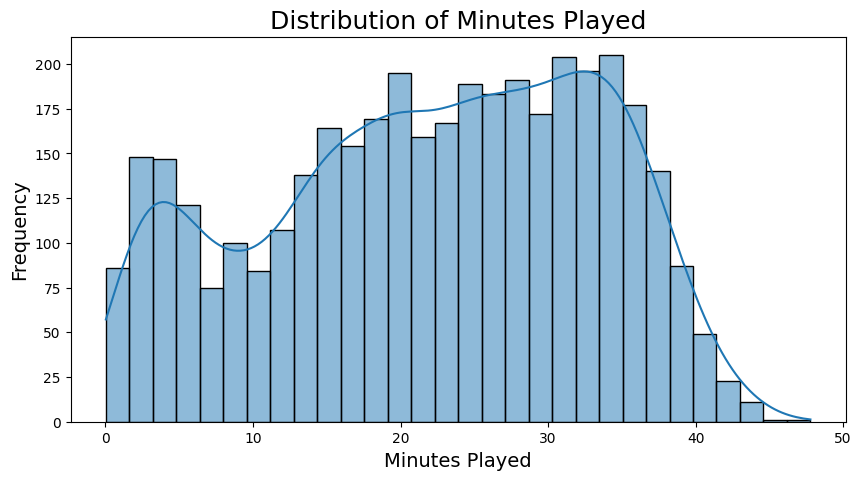

In [10]:
# Distribution of Minutes Played
plt.figure(figsize=(10, 5))
sns.histplot(data['MP'], bins=30, kde=True)
plt.title('Distribution of Minutes Played', fontsize=18)
plt.xlabel('Minutes Played', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

Text(0, 0.5, 'Total Points')

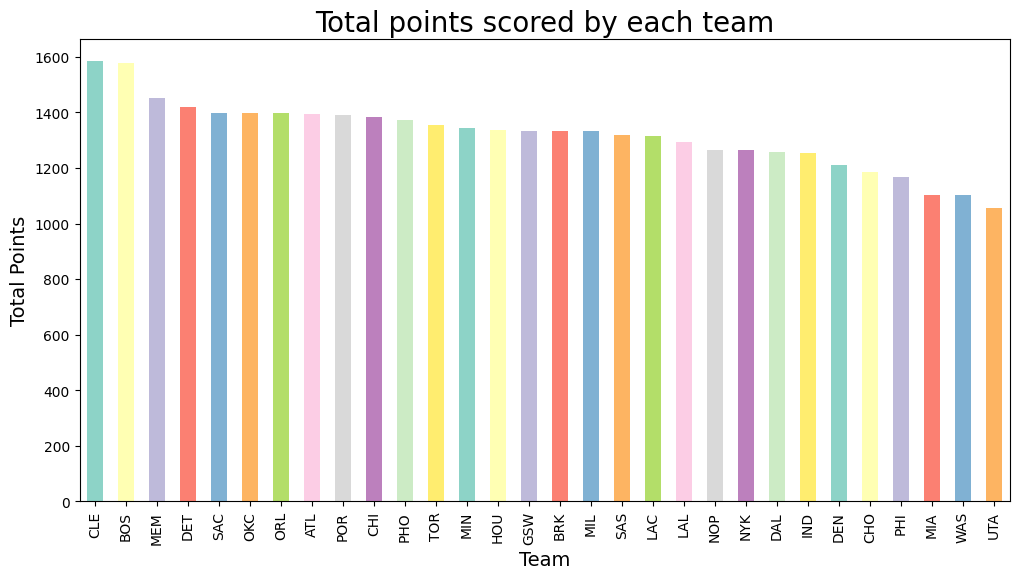

In [11]:
sum1 = data.groupby('Tm')['PTS'].sum().sort_values(ascending=False)
plt.figure(figsize = (12,6))
sum1.plot(kind = 'bar', color = sns.color_palette("Set3"))
plt.title('Total points scored by each team', fontsize=20)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Total Points', fontsize = 14)

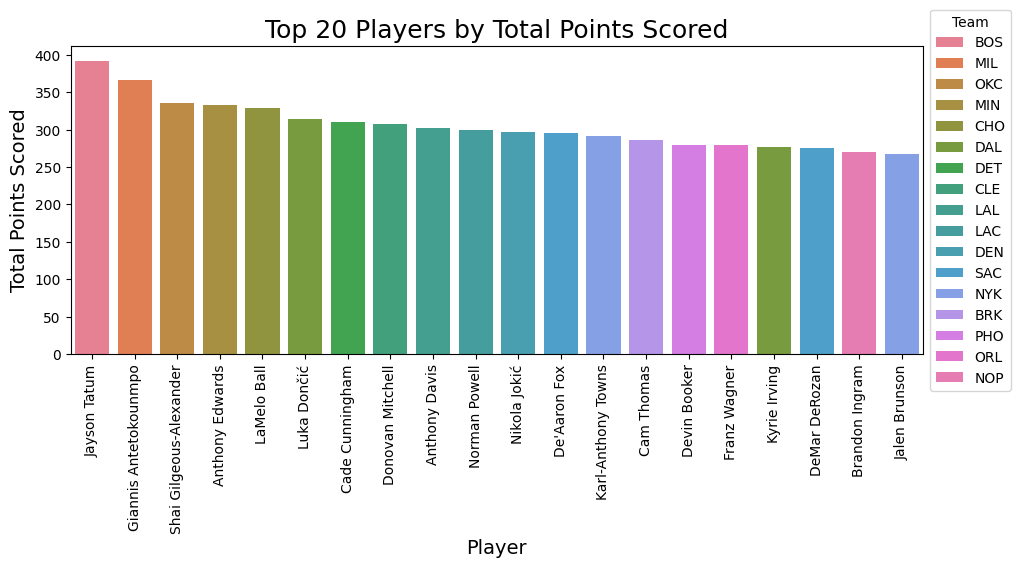

In [12]:
# Compare top players based on Points Scored (PTS)
sum2= data.groupby('Player')['PTS'].sum().sort_values(ascending=False).head(20)
df_sum2 = pd.DataFrame(data.groupby('Player')['PTS'].sum().sort_values(ascending=False).head(20))      # nlargest(20) can also work
# To display Team as well
compare1 = pd.merge(df_sum2, data[['Tm','Player']], on='Player', how='inner')  # Merge the df_sum2 with original dataset by a common column

plt.figure(figsize=(11,4))
sns.barplot(x= 'Player',y = 'PTS', hue = 'Tm', data = compare1)
plt.title('Top 20 Players by Total Points Scored', fontsize=18)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Total Points Scored', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Team', loc='center left', bbox_to_anchor=(1, 0.5))    # To move the legend tag to the right end of the table
plt.show()

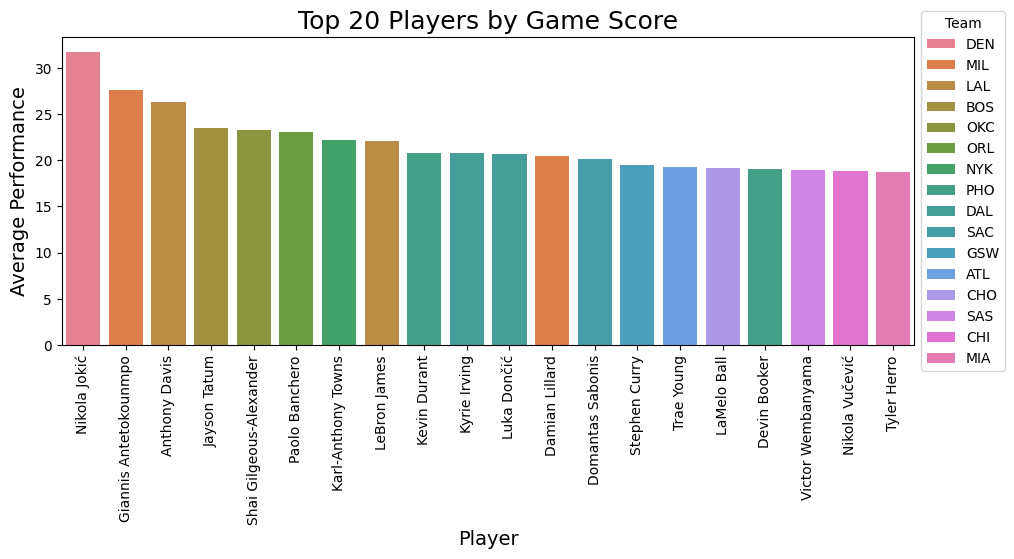

In [13]:
# A dataframe that sorts player by their game score and displays the 20 largest
sum3 = data.groupby('Player')['GmSc'].mean().nlargest(20)   # Top 20 players by Game Score (GmSc)
df_sum3 = pd.DataFrame(data.groupby('Player')['GmSc'].mean().nlargest(20)) 
compare2 = pd.merge(df_sum3, data[['Tm','Player']], on='Player', how='inner')  # Merge the df_sum2 with original dataset by a common column

plt.figure(figsize = (11,4))
sns.barplot(x ='Player', y= 'GmSc', hue = 'Tm', data = compare2)
plt.xticks(rotation = 90)
plt.title('Top 20 Players by Game Score', fontsize = 18)
plt.xlabel('Player',fontsize = 14)
plt.ylabel('Average Performance', fontsize = 14)
plt.legend(title='Team', loc='center left', bbox_to_anchor=(1, 0.5))    # To move the legend tag to the right end of the table
plt.show()

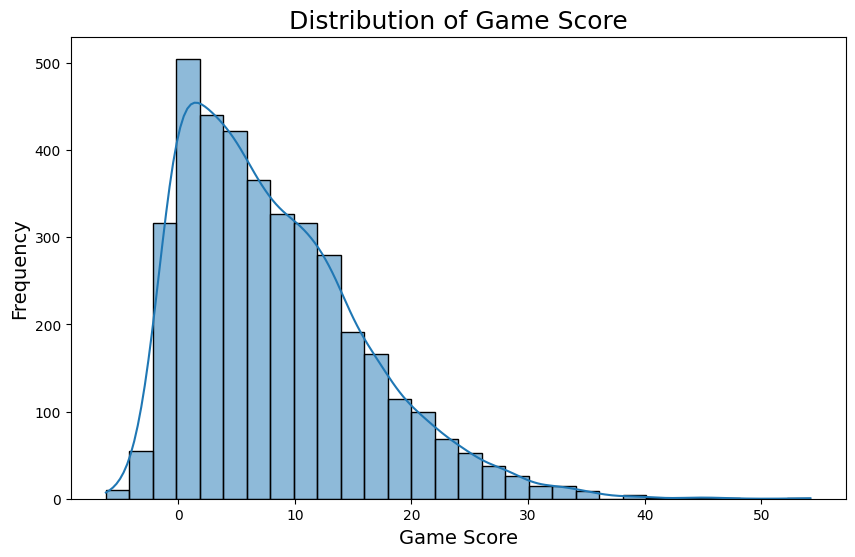

In [14]:
# Distribution of Game Score (GmSc)
plt.figure(figsize=(10, 6))
sns.histplot(data['GmSc'], bins=30, kde=True)
plt.title('Distribution of Game Score', fontsize=18)
plt.xlabel('Game Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

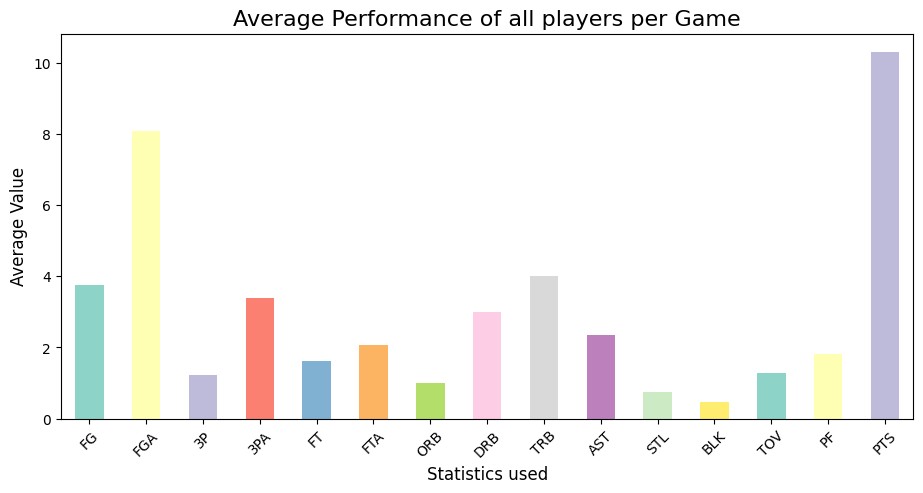

In [15]:
# Average Performance per Game
avg_performance = data[['FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].mean()
plt.figure(figsize = (11,5))
avg_performance.plot(kind='bar', color= sns.color_palette('Set3'))
plt.title('Average Performance of all players per Game', fontsize=16)
plt.xlabel('Statistics used', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Correlation among all columns in the dataset

<Axes: >

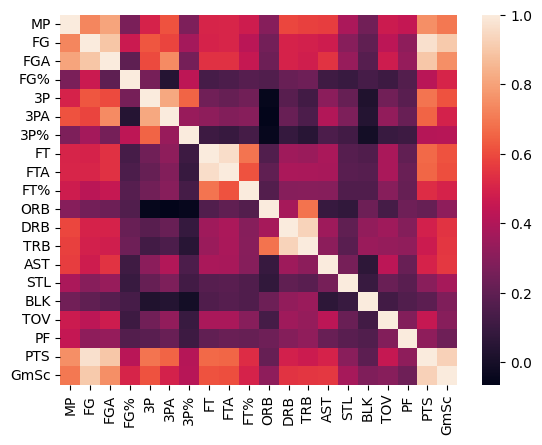

In [16]:
# Select only numeric columns for calculation
numeric_columns = data.select_dtypes(include=['number'])
relation = numeric_columns.corr()
sns.heatmap(relation)

# We can see that each variable is related to other variables in the dataset, so all the columns are important for our Game prediction

# Win vs Loss Analysis

## Compare performance based on game result (Win vs Loss)

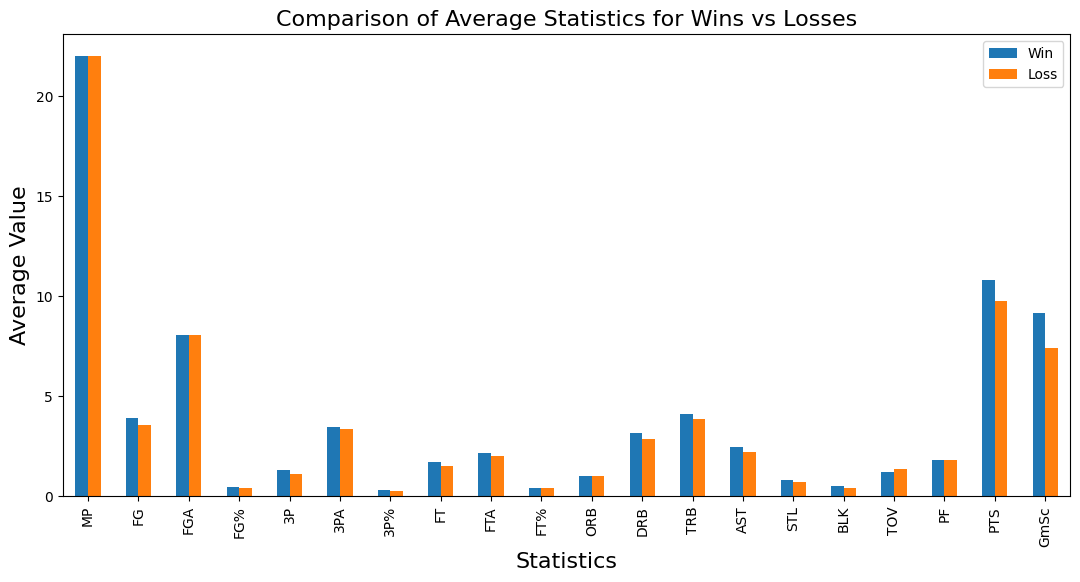

In [17]:
# Select only numeric columns for calculation
numeric_columns = data.select_dtypes(include=['number']).columns

# Calculate average stats for Wins (W) and Losses (L)
win_stats = data[data['Res'] == 'W'][numeric_columns].mean()
loss_stats = data[data['Res'] == 'L'][numeric_columns].mean()

# Plot comparison of average stats for wins vs losses
compare3 = pd.DataFrame({'Win': win_stats, 'Loss': loss_stats})

compare3.plot(kind='bar',figsize = (13,6))
plt.title('Comparison of Average Statistics for Wins vs Losses', fontsize=16)
plt.xlabel('Statistics', fontsize=16)
plt.ylabel('Average Value', fontsize=16)
plt.show()

# **Result Prediction.... making use of CatBoostClassifier**

## Note: In our prediction model, we will only make use of the numerical columns (CatBoostClassifier will ensure that) because they are needed for our prediction but the other columns like player's name, team and opponent are still needed for understanding and frontend deployment

In [18]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Prepare the dataset
numeric_columns = data.select_dtypes(include=['number']).columns  # Numeric columns

X = data[numeric_columns]
y = data['Res'].apply(lambda x: 1 if x == 'W' else 0)  # Convert 'W' to 1 and 'L' to 0

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # conventional random state (42)

# Instiating and fitting the model
model = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=6, cat_features = []) # iterations=1000: Specifies the number of boosting iterations (trees to build). learning_rate=0.05: Controls the step size at each iteration. Predictions and evaluation Depth=6: Determines the depth of each decision tree.
model.fit(X_train, y_train, verbose=100)           #verbose=100: Logs the training process every 100 iterations for better monitoring of the progress.

0:	learn: 0.6913050	total: 180ms	remaining: 2m 59s
100:	learn: 0.6105444	total: 815ms	remaining: 7.26s
200:	learn: 0.5557132	total: 1.48s	remaining: 5.87s
300:	learn: 0.5038089	total: 2.1s	remaining: 4.87s
400:	learn: 0.4574206	total: 2.72s	remaining: 4.06s
500:	learn: 0.4229771	total: 3.35s	remaining: 3.33s
600:	learn: 0.3899375	total: 3.98s	remaining: 2.64s
700:	learn: 0.3622760	total: 4.61s	remaining: 1.97s
800:	learn: 0.3377748	total: 5.24s	remaining: 1.3s
900:	learn: 0.3136075	total: 5.87s	remaining: 645ms
999:	learn: 0.2926571	total: 6.49s	remaining: 0us


In [19]:
y_pred = model.predict(X_test)

In [20]:
# To check accuracy
tn, fp, tp, fn = metrics.confusion_matrix(y_test,y_pred).ravel()

print(f'True positives: {tp}')
print(f'False positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print(f'Accuracy Score = {metrics.accuracy_score(y_test, y_pred)}')
print(f'Precision Score = {metrics.precision_score(y_test, y_pred)}')
print(f'Recall Score = {metrics.recall_score(y_test, y_pred)}\n')


True positives: 170
False positives: 169
True Negatives: 219
False Negatives: 211
Accuracy Score = 0.5591677503250976
Precision Score = 0.5552631578947368
Recall Score = 0.5538057742782152



# **Result Prediction.... making use of XGBoostClassifier** (Model Improvement)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

scaler = StandardScaler()
X = scaler.fit_transform(X)


# Define the hyper parameter grid
param_grid = {
    'max_depth': [3, 6, 10],                           # Maximum depth of a tree
    'learning_rate': [0.01, 0.05, 0.1],                # Step size shrinkage 
    'n_estimators': [100, 500, 1000],                  # Number of boosting rounds
}

# Instantiate the model
model2 = XGBClassifier()

# Use GridSearchCV
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)   
grid_search.fit(X_train, y_train)

# Get best hyperparameters / score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Params: {best_params}")
print(f"Best Score: {best_score}")

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
Best Score: 0.5718940548780488


In [22]:
# To check accuracy
print(f'True positives: {tp}')
print(f'False positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print(f'Accuracy Score = {metrics.accuracy_score(y_test, y_pred)}')
print(f'Precision Score = {metrics.precision_score(y_test, y_pred)}')
print(f'Recall Score = {metrics.recall_score(y_test, y_pred)}\n')


True positives: 170
False positives: 169
True Negatives: 219
False Negatives: 211
Accuracy Score = 0.5708712613784135
Precision Score = 0.5784615384615385
Recall Score = 0.49343832020997375



## The accuracy is higher with XGBoostClassifier 

# The outcome of a match can be predicted through any player's performance in the 24/25 NBA Season

### Example using random data


In [23]:
sample = [[25,19,28,1,8,10,1,14,18,1,8,10,12,10,5,5,10,5,40,30]]     # Inputing sample staticstics from the database
sample = scaler.fit_transform(sample)                                # Scaling the sample
prediction = best_model.predict(sample)                              # Carrying out XGBoostClassifier (Most accurate Prediction)
if (prediction == [0]):
    print("The Player's Team will not win.")
else:
    print("The player's Team will win")

The player's Team will win
